# Thrust to weight ratio

Defined as the maximum static thrust at sea-level divided by the maximum takeoff weight.
If the ratio is less than 1 the craft will not lift off the ground

$\large {\text{TWR}}={\frac {F_{T}}{m g_{0}}}>1$


$F_{T}$ - the thrust of the engines

$m$ - the total mass of the craft

$g_{0}$ - the local gravitational acceleration (on Earth exactly $9.80665 \frac{m}{s^2}$)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def thrust_to_weight(thrust, mass, g):
    return (thrust) / (mass * g)

## Example - launching Falcon 9 from Earth and Mars surface

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Falcon_9_logo_by_SpaceX.png" width="100">

| Stage | Engines           | $I_{sp}$ | Thrust | Dry mass  | Fuel       | Fuel volume | Burn time |
| ----- | ----------------- | -------- | ------ | --------- | ---------- | ----------- | --------- |
| 1     | 9 x Merlin 1D+    | 282 s    | 845 kN | 25,600 kg | LOx + RP-1 | 398,887 L   | 162 s     |
| 2     | 1 x Merlin 1D+Vac | 348 s    | 934 kN | 4,000 kg  | LOx + RP-1 | 108,185 L   | 346 s     |


In [3]:
# Earth gravitational accelleration
G_0 = 9.80665
# Mars gravitational accelleration
M_0 = 3.72076

In [4]:
import json

In [5]:
with open('falcon_9_v1.2.json') as fp:
    specs = json.load(fp)

In [6]:
dry_mass_2nd_stage = specs['stages'][1]['dry_mass']
wet_mass_2nd_stage = dry_mass_2nd_stage + specs['stages'][1]['fuel_mass']

# dry mass of the 1st stage with 2nd stage on top
dry_mass_1st_stage = specs['stages'][0]['dry_mass'] + wet_mass_2nd_stage
# wet mass of the 1st stage with 2nd stage on top
wet_mass_1st_stage = dry_mass_1st_stage + specs['stages'][0]['fuel_mass']

In [7]:
engines = np.arange(0, 10)
stage_1 = thrust_to_weight(engines * specs['stages'][0]['thrust'], wet_mass_1st_stage, G_0)
stage_1_M = thrust_to_weight(engines * specs['stages'][0]['thrust'], wet_mass_1st_stage, M_0)
stage_2 = thrust_to_weight(engines * specs['stages'][1]['thrust'], wet_mass_2nd_stage, G_0)
stage_2_M = thrust_to_weight(engines * specs['stages'][1]['thrust'], wet_mass_2nd_stage, M_0)

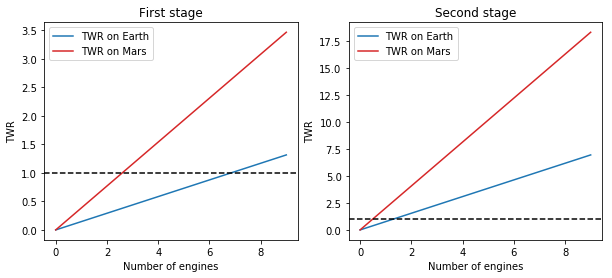

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(engines, stage_1, 'C0', label='TWR on Earth')
ax[0].plot(engines, stage_1_M, 'C3', label='TWR on Mars')
ax[0].set_title('First stage')
ax[0].axhline(1, color='k', linestyle='--')
ax[0].set_xlabel('Number of engines')
ax[0].set_ylabel('TWR')
ax[0].legend()

ax[1].plot(engines, stage_2, 'C0', label='TWR on Earth')
ax[1].plot(engines, stage_2_M, 'C3', label='TWR on Mars')
ax[1].set_title('Second stage')
ax[1].axhline(1, color='k', linestyle='--')
ax[1].set_xlabel('Number of engines')
ax[1].set_ylabel('TWR')
ax[1].legend()

plt.show();

**Observe**

- First stage
    - needs at least 7 engines to lift from Earth surface
    - needs only 3 engines to lift from Mars surface
- Second stage
    - is not able to lift from Earth surface with 1 engine, it would need at least 2-3 engines (assuming lower Isp)
    - there should be no problem with lifting payload from Mars, even with 1 engine
- Why 9 engines?
    - Gravity drag. Efficiency drops drastically with increasing time spent thrusting against gravity. Therefore, it is advisable to minimize the burn time.
    - The higher thrust the less time we spend on accelleration
    - More engines = more thrust

## Sources

- https://en.wikipedia.org/wiki/Thrust-to-weight_ratio
- https://en.wikipedia.org/wiki/Falcon_9
- https://www.reddit.com/r/spacex/comments/3lsm0q/f9ft_vs_f9v11_fuel_mass_flow_rate_isp/
- http://www.spaceflightinsider.com/hangar/falcon/
- http://www.b14643.de/Spacerockets_2/United_States_1/Falcon-9/Merlin/index.htm